### Importando bibliotecas

In [ ]:
# Primeiro, realizamos a instalação do scikit-learn versão 0.20.0
#!pip install scikit-learn==0.20.0 --upgrade

In [1]:
# Em seguida iremos importar diversas bibliotecas que serão utilizadas:

# Pacote para exploração e análise de dados
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np


# Pacotes do scikit-learn para pré-processamento de dados
# "SimpleImputer" é uma transformação para preencher valores faltantes em conjuntos de dados
from sklearn.impute import SimpleImputer


# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split

# Método para criação de modelos baseados em Floresta Ramdomica
from sklearn.ensemble import RandomForestClassifier


# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline



### Importando o dataset no projeto

In [2]:

import pandas as pd
import scipy as stats

body = 'dataset_desafio_2.csv'
df_data_1 = pd.read_csv(body)
df_data_1.head()

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,397093,Jason Jytereoman Izoimum,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,915288,Bartolomeu Inácio da Gama,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,192652,Fernanda Guedes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,949491,Alessandre Borba Gomes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE


Temos 15 colunas presentes no dataset fornecido, sendo dezessete delas variáveis características (dados de entrada) e um delas uma variável-alvo (que queremos que o nosso modelo seja capaz de prever). 

As variáveis características são:

    MATRICULA       - número de matrícula do estudante
    NOME            - nome completo do estudante
    REPROVACOES_DE  - número de reprovações na disciplina de ``Direito Empresarial``
    REPROVACOES_EM  - número de reprovações na disciplina de ``Empreendedorismo``
    REPROVACOES_MF  - número de reprovações na disciplina de ``Matemática Financeira``
    REPROVACOES_GO  - número de reprovações na disciplina de ``Gestão Operacional``
    NOTA_DE         - média simples das notas do aluno na disciplina de ``Direito Empresarial`` (0-10)
    NOTA_EM         - média simples das notas do aluno na disciplina de ``Empreendedorismo`` (0-10)
    NOTA_MF         - média simples das notas do aluno na disciplina de ``Matemática Financeira`` (0-10)
    NOTA_GO         - média simples das notas do aluno na disciplina de ``Gestão Operacional`` (0-10)
    INGLES          - variável binária que indica se o estudante tem conhecimento em língua inglesa (0 -> sim ou 1 -> não).
    H_AULA_PRES     - horas de estudo presencial realizadas pelo estudante
    TAREFAS_ONLINE  - número de tarefas online entregues pelo estudante
    FALTAS          - número de faltas acumuladas do estudante (todas disciplinas)
    
A variável-alvo é:

    PERFIL               - uma *string* que indica uma de cinco possibilidades: 
        "EXCELENTE"      - Estudante não necessita de mentoria
        "MUITO BOM"      - Estudante não necessita de mentoria
        "HUMANAS"        - Estudante necessita de mentoria exclusivamente em matérias com conteúdo de ciências humanas
        "EXATAS"         - Estudante necessita de mentoria apenas em disciplinas com conteúdo de ciências exatas
        "DIFICULDADE"    - Estudante necessita de mentoria em duas ou mais disciplinas
        


### Explorando os dados fornecidos

Podemos continuar a exploração dos dados fornecidos com a função ``info()``:

In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRICULA       20000 non-null  int64  
 1   NOME            20000 non-null  object 
 2   REPROVACOES_DE  20000 non-null  int64  
 3   REPROVACOES_EM  20000 non-null  int64  
 4   REPROVACOES_MF  20000 non-null  int64  
 5   REPROVACOES_GO  20000 non-null  int64  
 6   NOTA_DE         20000 non-null  float64
 7   NOTA_EM         20000 non-null  float64
 8   NOTA_MF         20000 non-null  float64
 9   NOTA_GO         16284 non-null  float64
 10  INGLES          16372 non-null  float64
 11  H_AULA_PRES     20000 non-null  int64  
 12  TAREFAS_ONLINE  20000 non-null  int64  
 13  FALTAS          20000 non-null  int64  
 14  PERFIL          20000 non-null  object 
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


É notado que existem variáveis do tipo ``float64`` (números "decimais"), variáveis do tipo ``int64`` (números inteiros) e do tipo ``object`` (nesse caso são *strings*, ou texto). 

Como a maioria dos algoritmos de aprendizado estatístico supervisionado só aceita valores numéricos como entrada, é necessário então o pré-processamento das variáveis do tipo "object" antes de usar esse dataset como entrada para o treinamento de um modelo. Também é notado que existem valores faltantes em várias colunas. Esses valores faltantes também devem ser tratados antes de serem construídos modelos com esse conjunto de dados base.

In [4]:
df_data_1.describe()

,MATRICULA,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,16372.000000,20000.000000,20000.000000,20000.000000
mean,551148.271400,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,0.646286,5.102950,3.140300,4.060600
std,259488.766584,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,0.478136,4.118422,1.854909,1.674714
min,100003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,326554.250000,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,0.000000,2.000000,2.000000,3.000000
50%,550630.000000,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,1.000000,4.000000,3.000000,4.000000
75%,775524.750000,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,1.000000,6.000000,5.000000,6.000000
max,999995.000000,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,1.000000,25.000000,7.000000,8.000000


### Visualizações

Para visualizar o dataset fornecido, podemos utilizar as bibliotecas ``matplotlib`` e ``seaborn``:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='REPROVACOES_GO', ylabel='count'>

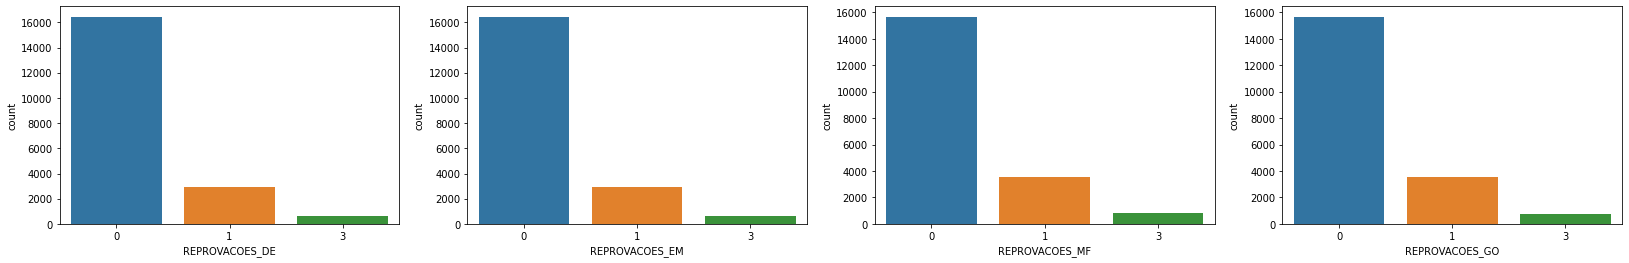

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='REPROVACOES_DE', data=df_data_1)
sns.countplot(ax=axes[1], x='REPROVACOES_EM', data=df_data_1)
sns.countplot(ax=axes[2], x='REPROVACOES_MF', data=df_data_1)
sns.countplot(ax=axes[3], x='REPROVACOES_GO', data=df_data_1)

<AxesSubplot:xlabel='NOTA_GO', ylabel='Density'>

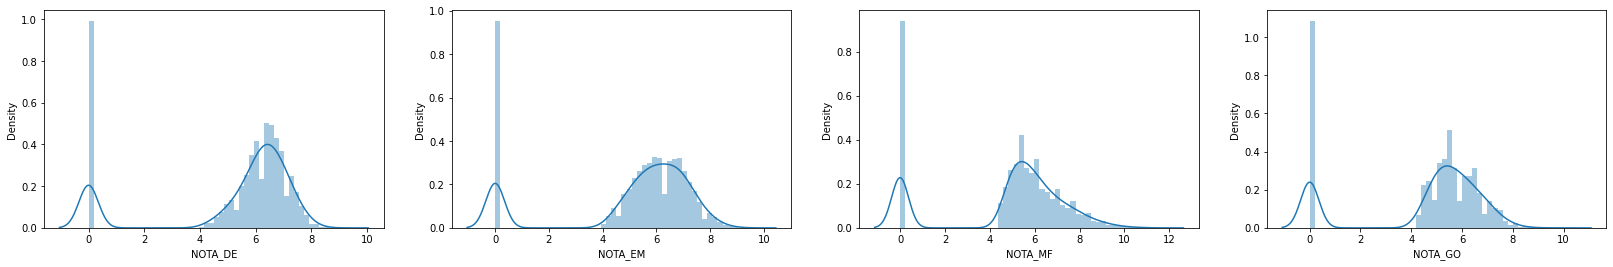

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.distplot(df_data_1['NOTA_DE'], ax=axes[0])
sns.distplot(df_data_1['NOTA_EM'], ax=axes[1])
sns.distplot(df_data_1['NOTA_MF'], ax=axes[2])
sns.distplot(df_data_1['NOTA_GO'].dropna(), ax=axes[3])

<AxesSubplot:xlabel='TAREFAS_ONLINE', ylabel='count'>

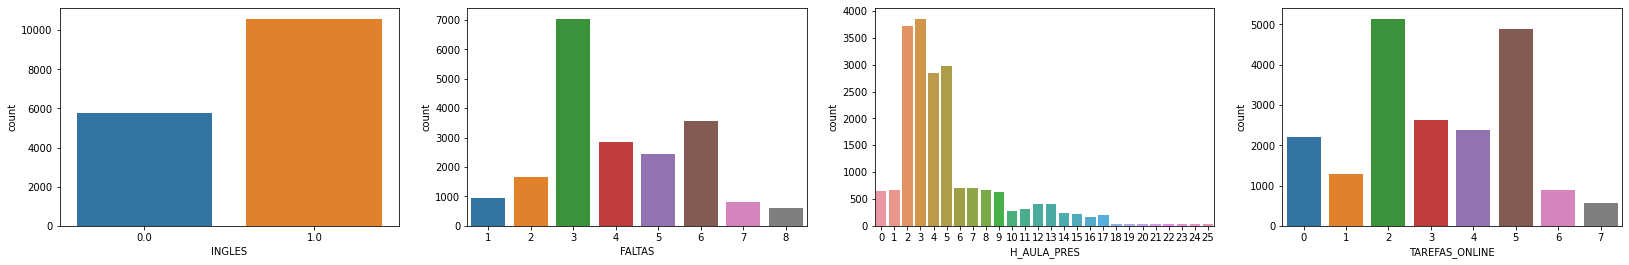

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='INGLES', data=df_data_1)
sns.countplot(ax=axes[1], x='FALTAS', data=df_data_1)
sns.countplot(ax=axes[2], x='H_AULA_PRES', data=df_data_1)
sns.countplot(ax=axes[3], x='TAREFAS_ONLINE', data=df_data_1)

<AxesSubplot:xlabel='PERFIL', ylabel='count'>

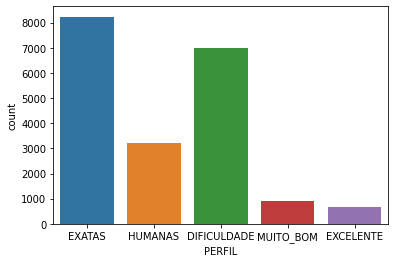

In [9]:
fig = plt.plot()
sns.countplot(x='PERFIL', data=df_data_1)

# Preprocessando o dataset

Este conjunto de classes contem técnicas de remoção de colunas, filtragem, balanceamento e resolução de valores faltantes no arquivo inicial.

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample


class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')
 
# Retorna um novo dataframe com valor nulo igual a média dos demais values nas colunas escolhidas
class RecalculateNullNumericValues(BaseEstimator, TransformerMixin):
    def __init__(self, initialnumericcolumn, finalnumericcolumn):
        self.initialnumericcolumn = initialnumericcolumn
        self.finalnumericcolumn = finalnumericcolumn
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        data = X.copy()
        values = data.loc[:,self.initialnumericcolumn:self.finalnumericcolumn]
        values = values.T.fillna(round(values.mean(axis=1),1)).T
        data.loc[:,self.initialnumericcolumn:self.finalnumericcolumn] = values
        return data

# Retorna um novo dataframe com dados balanceados, para isso é verificado se a melhor opção é o Oversampling ou Downsampling
class BalanceClasses(BaseEstimator, TransformerMixin):
    def oversample(self, classe, n_samples):
        return resample(classe, replace=True, n_samples=n_samples, random_state=42)
        
    def undersample(self, classe, n_samples):
        return resample(classe, replace=False, n_samples=n_samples, random_state=42 )
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        data = X.copy()
        target = []
        freq = data.PERFIL.value_counts()
        mean_avg = int( freq.mean() )
        resampled = []
        
        for value in data.PERFIL.unique():
            target.append( data[data.PERFIL == value] )
            if target[-1].shape[0] > mean_avg:
                resampled.append( self.undersample( target[-1], mean_avg ))
            else:
                resampled.append( self.oversample( target[-1], mean_avg ))
        
        return pd.concat(resampled)

    
# Transformação Clamp para garantir valores de notas entre 0-10
class ClampClasses(BaseEstimator, TransformerMixin):
    def __init__(self, initialnumericcolumn, finalnumericcolumn):
        self.initialnumericcolumn = initialnumericcolumn
        self.finalnumericcolumn = finalnumericcolumn
        
    def fit(self, X, y=None):
          return self

    def transform(self, X):
          data = X.copy()
          values = data.loc[:,self.initialnumericcolumn:self.finalnumericcolumn]
          values = values.clip(0.0,10.0)
          data.loc[:,self.initialnumericcolumn:self.finalnumericcolumn] = values
          return data

Criando um novo dataset preprocessado

In [11]:


# Instanciando uma transformação Clamp para garantir valores de notas entre 0-10
clamp_val = ClampClasses( initialnumericcolumn='NOTA_DE', finalnumericcolumn='NOTA_GO')
clamp_val.fit(X=df_data_1)
df_data_2 = pd.DataFrame.from_records(
    data=clamp_val.transform(
        X=df_data_1       
    ),
)


# Instanciando uma transformação par recalcular dados numericos nulos
missing_val = RecalculateNullNumericValues(initialnumericcolumn='NOTA_DE', finalnumericcolumn='NOTA_GO')
missing_val.fit(X=df_data_2)
df_data_3 = pd.DataFrame.from_records(
    data=missing_val.transform(
        X=df_data_2        
    ),
)


# Reconstruindo um DataFrame Pandas com o resultado da transformação para disciplina de inglês separadamente
si = SimpleImputer(
    missing_values=np.nan,  # os valores faltantes são do tipo ``np.nan`` (padrão Pandas)
    strategy='constant',  # a estratégia escolhida é a alteração do valor faltante por uma constante
    fill_value=0,  # a constante que será usada para preenchimento dos valores faltantes é um int64=0.
    verbose=0,
    copy=True
)

si.fit(X=df_data_3)
df_data_4 = pd.DataFrame.from_records(
    data=si.transform(
        X=df_data_3
    ),  
    columns=df_data_3.columns  # as colunas originais devem ser conservadas nessa transformação
)



# Instanciando o balanceamento do dataset com upsampling e undersampling
res = BalanceClasses()
res.fit(df_data_4)
df_data_5 = pd.DataFrame.from_records(
    data=res.transform(
        X=df_data_4
    ),  
)



### Treinando um modelo de classificação

#### Definindo as features do modelo

In [12]:
# Definição das colunas que serão features
features = [
    "MATRICULA", "NOME", 'REPROVACOES_DE', 'REPROVACOES_EM', "REPROVACOES_MF", "REPROVACOES_GO",
    "NOTA_DE", "NOTA_EM", "NOTA_MF", "NOTA_GO",
    "INGLES", "H_AULA_PRES", "TAREFAS_ONLINE", "FALTAS", 
]

# Definição da variável-alvo
target = ["PERFIL"]

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
X = df_data_5[features]
y = df_data_5[target]

O conjunto de entrada (X):

In [13]:
X.head()

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
0,401169,Sebastião Emílio Giribahe de Osório,0,0,0,0,5.6,5.2,6.2,4.7,0.0,16,7,3
1,539782,Hilda Marina Negrão Ymeoer,0,0,0,0,5.9,5.7,5.9,4.8,0.0,5,5,4
2,225830,Wellington Acegernão,0,0,0,0,6.0,4.8,5.6,5.4,1.0,3,2,6
3,817583,Iago Nivaldo de Sales,0,0,0,0,7.1,7.0,6.0,6.7,1.0,7,5,3
4,909085,Magali Burnubiclilão Gutierrez de Oliveira,0,0,0,0,6.0,6.7,4.6,4.7,1.0,5,4,3


As variáveis-alvo correspondentes (y):

In [14]:
y.head()

,PERFIL
0,EXATAS
1,EXATAS
2,EXATAS
3,EXATAS
4,EXATAS


In [15]:
# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)


Criando um modelo baseado em **Floresta Ramdomica**

In [16]:
ramdom = RandomForestClassifier(n_estimators=2000)

Criação da pipeline

In [17]:

clamp_val = ClampClasses(
    initialnumericcolumn='NOTA_DE',
        finalnumericcolumn='NOTA_GO')

recalculate_values = RecalculateNullNumericValues(
    initialnumericcolumn='NOTA_DE',
        finalnumericcolumn='NOTA_GO')

rm_columns = DropColumns(
    columns=["NOME","FALTAS","MATRICULA", "INGLES"]
)


my_pipeline = Pipeline(
    steps=[
        ('remove_cols', rm_columns),
        ('clamp', clamp_val),
        ('recalculate_vals', recalculate_values),
        ('imputer', si),
        ('dtc', RandomForestClassifier(n_estimators=2000)),
    ]
)

In [18]:
my_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('remove_cols',
                 DropColumns(columns=['NOME', 'FALTAS', 'MATRICULA',
                                      'INGLES'])),
                ('clamp',
                 ClampClasses(finalnumericcolumn='NOTA_GO',
                              initialnumericcolumn='NOTA_DE')),
                ('recalculate_vals',
                 RecalculateNullNumericValues(finalnumericcolumn='NOTA_GO',
                                              initialnumericcolumn='NOTA_DE')),
                ('imputer', SimpleImputer(fill_value=0, strategy='constant')),
                ('dtc', RandomForestClassifier(n_estimators=2000))])

In [22]:
# Realização de teste cego no modelo criado
y_pred = my_pipeline.predict(X_test)

In [23]:
X_test.head()

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
5414,612438,Ana Raíssa de Ramos Guedes,0,0,0,0,6.3,6.2,8.6,7.0,0.0,9,4,3
7475,223575,Paula Flaymov,0,0,0,0,7.4,7.3,7.4,7.4,0.0,11,5,4
17254,929526,Robert de Ortega Júnior,0,0,0,0,7.9,8.1,9.5,7.4,1.0,8,4,2
1716,335816,Aurélio Fabrício de Diniz Inuman,0,0,0,0,6.1,6.9,6.3,5.6,0.0,3,4,3
18538,391803,Jéssica Denise da Gama,0,0,0,0,7.2,8.5,10.0,8.5,1.0,8,5,3


In [24]:
print(y_pred)

['HUMANAS' 'HUMANAS' 'EXCELENTE' ... 'MUITO_BOM' 'HUMANAS' 'HUMANAS']


In [26]:
from sklearn.metrics import accuracy_score

# Acurácia alcançada
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, pred), 10)))


Acurácia: 90.96666667%
